In [130]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [22]:
df=pd.read_csv("1000 Records.csv",sep=",")

pd.set_option('display.max_columns', 40)
df.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,Date of Birth,Time of Birth,Age in Yrs.,Weight in Kgs.,Date of Joining,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Month Name of Joining,Short Month,Day of Joining,DOW of Joining,Short DOW,Age in Company (Years),Salary,Last % Hike,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,12-12-1971,6:34:47 AM,45.66,44,12/18/2010,Q4,H2,2010,12,December,Dec,18,Saturday,Sat,6.61,119090,17%,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,10/31/1993,2:02:38 AM,23.76,52,4/25/2017,Q2,H1,2017,4,April,Apr,25,Tuesday,Tue,0.26,117991,14%,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,11/26/1994,3:48:27 PM,22.68,42,3/27/2017,Q1,H1,2017,3,March,Mar,27,Monday,Mon,0.34,161045,28%,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,11/24/1975,9:44:16 PM,41.70,43,2/25/2003,Q1,H1,2003,2,February,Feb,25,Tuesday,Tue,14.43,142616,16%,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,3/13/1995,9:30:28 PM,22.39,58,10-11-2016,Q4,H2,2016,10,October,Oct,11,Tuesday,Tue,0.79,135706,11%,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


M    509
F    491
Name: Gender, dtype: int64


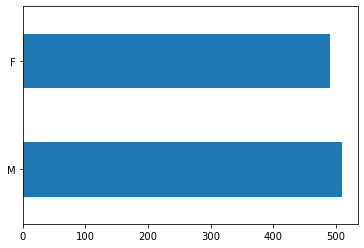

In [5]:
df['Gender'].value_counts().plot(kind='barh')
print(df['Gender'].value_counts())

In [6]:
df['Year of Joining'].value_counts()

2016    85
2017    68
2015    68
2013    66
2012    53
2014    52
2009    52
2011    51
2010    41
2006    39
2007    36
2001    35
2004    31
2008    31
2005    31
1999    30
2002    25
2003    24
2000    23
1998    18
1995    16
1994    15
1996    12
1985    12
1987    12
1990    12
1993    11
1997    10
1988     7
1992     7
1989     6
1991     5
1981     4
1986     3
1983     3
1984     2
1982     2
1980     2
Name: Year of Joining, dtype: int64

In [7]:
df.describe()

,Emp ID,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Zip
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,549097.583000,40.377250,59.409000,2006.992000,6.415000,16.481000,10.093720,120288.528000,48698.499000
std,264810.879315,11.107729,13.900322,8.565588,3.428488,8.831514,8.568863,45178.339916,27396.021481
min,114425.000000,21.040000,40.000000,1980.000000,1.000000,1.000000,0.000000,40040.000000,1002.000000
25%,307757.000000,30.925000,49.000000,2002.000000,4.000000,9.000000,3.152500,82122.000000,25421.750000
50%,543073.000000,40.730000,57.000000,2009.000000,6.000000,17.000000,7.815000,119409.000000,47416.500000
75%,788450.250000,49.852500,68.000000,2014.000000,10.000000,24.000000,15.465000,159109.000000,71101.000000
max,999475.000000,59.980000,90.000000,2017.000000,12.000000,31.000000,37.570000,199943.000000,99791.000000


In [18]:
#Correlation Between Salary and the Age in Company 
cor=df["Salary"].corr(df["Age in Company (Years)"])
cor

0.054212038192536914

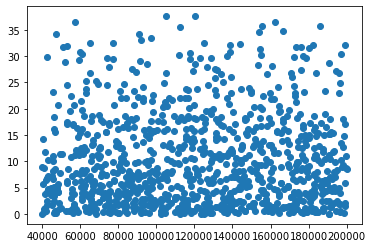

In [19]:
plt.scatter(df["Salary"],df["Age in Company (Years)"])

In [117]:
df_new=pd.DataFrame(df.iloc[:,[0,5,12,17,24,25,26]])
df_new
#we eliminated the rows which wont have effect on our target variable

,Emp ID,Gender,Age in Yrs.,Year of Joining,Age in Company (Years),Salary,Last % Hike
0,850297,F,45.66,2010,6.61,119090,17%
1,304721,M,23.76,2017,0.26,117991,14%
2,412317,F,22.68,2017,0.34,161045,28%
3,621375,F,41.70,2003,14.43,142616,16%
4,787549,F,22.39,2016,0.79,135706,11%
...,...,...,...,...,...,...,...
995,568435,F,32.01,2008,9.56,72930,10%
996,597409,M,30.48,2010,7.40,121949,16%
997,359608,F,59.88,2001,16.44,82734,14%
998,803426,F,30.21,2012,5.37,66854,9%


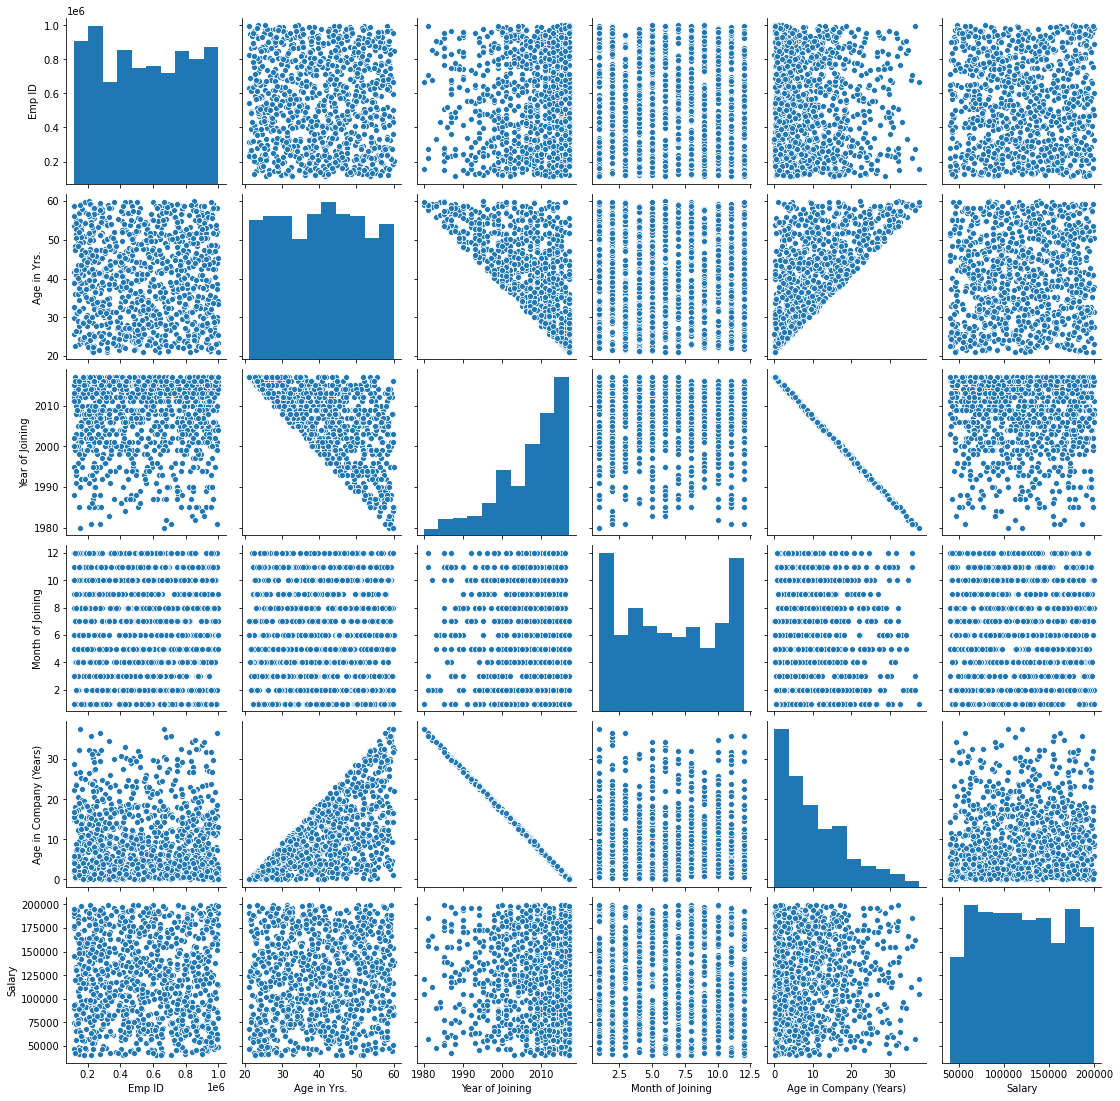

In [62]:
sns.pairplot(df_new)

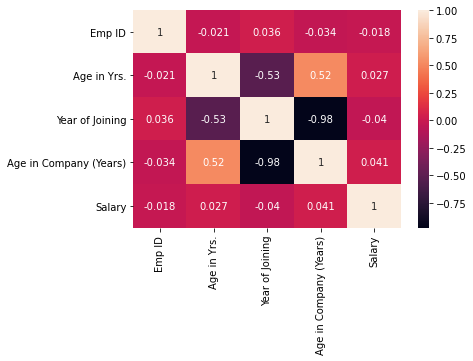

In [118]:
corr=df_new.corr(method ='kendall')
sns.heatmap(corr,annot=True)
#we are not able to see much of a corelation between Tareget and the attributes 

# Data transformation 

In [120]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new[["Emp ID","Gender","Last % Hike"]] = df_new[["Emp ID","Gender","Last % Hike"]].apply(le.fit_transform)
df_new

,Emp ID,Gender,Age in Yrs.,Year of Joining,Age in Company (Years),Salary,Last % Hike
0,820,0,45.66,2010,6.61,119090,9
1,246,1,23.76,2017,0.26,117991,6
2,352,0,22.68,2017,0.34,161045,21
3,580,0,41.70,2003,14.43,142616,8
4,748,0,22.39,2016,0.79,135706,3
...,...,...,...,...,...,...,...
995,521,0,32.01,2008,9.56,72930,2
996,558,1,30.48,2010,7.40,121949,8
997,303,0,59.88,2001,16.44,82734,6
998,769,0,30.21,2012,5.37,66854,30


In [121]:
df_new.astype(float)

,Emp ID,Gender,Age in Yrs.,Year of Joining,Age in Company (Years),Salary,Last % Hike
0,820.0,0.0,45.66,2010.0,6.61,119090.0,9.0
1,246.0,1.0,23.76,2017.0,0.26,117991.0,6.0
2,352.0,0.0,22.68,2017.0,0.34,161045.0,21.0
3,580.0,0.0,41.70,2003.0,14.43,142616.0,8.0
4,748.0,0.0,22.39,2016.0,0.79,135706.0,3.0
...,...,...,...,...,...,...,...
995,521.0,0.0,32.01,2008.0,9.56,72930.0,2.0
996,558.0,1.0,30.48,2010.0,7.40,121949.0,8.0
997,303.0,0.0,59.88,2001.0,16.44,82734.0,6.0
998,769.0,0.0,30.21,2012.0,5.37,66854.0,30.0


In [122]:
df_new.skew()

Emp ID                    0.000000
Gender                   -0.036060
Age in Yrs.               0.006173
Year of Joining          -0.958797
Age in Company (Years)    0.968211
Salary                    0.034356
Last % Hike               0.007634
dtype: float64

In [123]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
z
threshold=3
print(np.where(z>3))
df_new1=df_new[(z<3).all(axis=1)]
print("\n Original Shape", df_new.shape, "New Shape",df_new1.shape)
Percntage_loss=((1000-994)/1000)*100
print("\nPercentage loss:",Percntage_loss)

(array([594, 594, 606, 621, 621, 684, 684, 895, 999, 999], dtype=int64), array([3, 4, 3, 3, 4, 3, 4, 3, 3, 4], dtype=int64))

 Original Shape (1000, 7) New Shape (994, 7)

Percentage loss: 0.6


As the percentage loss <5% at 0.6% we can go ahead with model building 

In [124]:
y=df_new1["Salary"]
x=df_new1.drop("Salary", axis=1)
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'

In [125]:
from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [126]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 127 The model Perfomes very well
Training r2_score is: 0.7028913127797187
Testing r2_score is: 0.70194466334631
At random state 677 The model Perfomes very well
Training r2_score is: 0.5300629507864141
Testing r2_score is: 0.5267439187613077
At random state 981 The model Perfomes very well
Training r2_score is: 0.6350515432657411
Testing r2_score is: 0.6361727523436667


In [127]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=127)

In [131]:
models= [
    ("Lasso",Lasso()),
    ("Linear Regression",LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Ridge Regression",Ridge()),
    ("KNearest Neighbors",KNeighborsRegressor(1)),
    ("SVR",SVR())
    ]

In [132]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Lasso: -2039759255.916576 (170303327.631882)
Linear Regression: -2047402063.614697 (164996392.564946)
Decision Tree: -4474668427.990870 (409643631.877895)
Ridge Regression: -2039440083.762593 (170282042.553799)
KNearest Neighbors: -4167978187.769002 (465964735.226681)
SVR: -2011964862.083268 (183274837.944277)


In [133]:
scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
model = DecisionTreeRegressor()
model.fit(scaledx, y_train)

DecisionTreeRegressor()

In [134]:
scaledtestx = scaler.transform(x_test)
predictions = model.predict(scaledtestx)
print(r2_score(y_test, predictions))

-1.0834481639870046


In [135]:
predictions

array([131033.,  83011.,  76605., 124757., 183618.,  93228., 118621.,
        82550.,  40883., 158773., 183618.,  66854., 134013., 178707.,
       134013.,  65753., 191691.,  64976.,  60737.,  54762., 144259.,
       131453., 143194.,  65753., 166828., 136662., 163170., 199184.,
       110662.,  74192., 124374., 117004., 100184., 155291., 137843.,
       123599., 171662.,  65985., 119090., 103499., 130226., 159071.,
        88889.,  79233.,  48858., 105720.,  88373., 176601., 178750.,
        57746., 111953.,  70544., 115356., 199120., 185016., 100184.,
       104197., 176930., 126933., 111989., 186933.,  55791.,  77803.,
       174673., 144104., 168935., 179095., 140358., 127733.,  51802.,
       144108., 103327., 147243.,  89423.,  40883., 195749., 144280.,
        60566.,  67505., 140328., 154216., 180393., 121949., 160716.,
       183618., 131141., 113482., 161045.,  77803., 103848., 183279.,
        93417., 143194.,  72982., 107647., 103003., 174076., 199923.,
        53077.,  910

In [136]:
y_test

31     115858
972    154473
12      58733
960     72749
712    115968
        ...  
611     87760
448    129756
143    193315
446     70531
195     86919
Name: Salary, Length: 199, dtype: int64